# Testing Jacobians with `ConsIndShockModel_HANK`

In [1]:
from ConsIndShockModel_HANK import IndShockConsumerType 
import sequence_jacobian as sj  # SSJ will allow us to define blocks, models, compute IRFs, etc
from sequence_jacobian.classes import JacobianDict, SteadyStateDict
from sequence_jacobian import het, simple, create_model              # functions
import matplotlib.pyplot as plt
import numpy as np
import time
from copy import deepcopy
from scipy import optimize

In [2]:
r_ss = 0.03
Z_ss = 0.7925

In [3]:
HANK_Dict = {
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + r_ss,                    # Interest factor on assets
    "LivPrb" : [.99375],                   # Survival probability
    "DiscFac": 0.97,

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [.06],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [0.2],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    
    # HANK params
    "taxrate" : [0.0], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [Z_ss],
    "wage": [1.0],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.05,                      # Probability of unemployment while working
    "IncUnemp" :  0.0,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": 0.0,
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

In [4]:
# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict['TranShkMean_Func'] = [function]

In [5]:
Agent_GE = IndShockConsumerType(**HANK_Dict, verbose = False)

In [6]:
Agent_GE.compute_steady_state()

(3.2983874094785826, 0.8652651562682043)

In [7]:
CJACR, AJACR = Agent_GE.calc_jacobian("Rfree", 300)

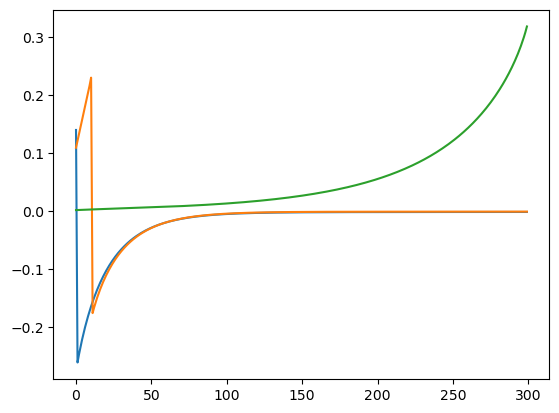

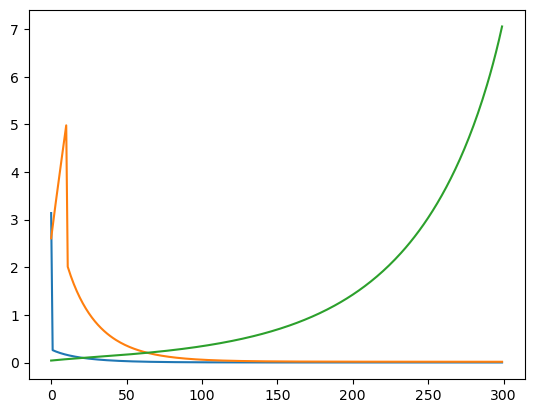

In [8]:
plt.plot(CJACR[0])
plt.plot(CJACR[10])
plt.plot(CJACR[-1])
plt.show()

plt.plot(AJACR[0])
plt.plot(AJACR[10])
plt.plot(AJACR[-1])

plt.show()

# Step By Step

In [9]:
T = 300
shk_param = "Rfree"

In [10]:
# Set up finite Horizon dictionary
params = deepcopy(Agent_GE.__dict__["parameters"])
params["T_cycle"] = T  # Dimension of Jacobian Matrix

# Specify a dictionary of lists because problem we are solving is technically finite horizon so variables can be time varying (see section on fake news algorithm in https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA17434 )
params["LivPrb"] = params["T_cycle"] * [Agent_GE.LivPrb[0]]
params["PermGroFac"] = params["T_cycle"] * [Agent_GE.PermGroFac[0]]
params["PermShkStd"] = params["T_cycle"] * [Agent_GE.PermShkStd[0]]
params["TranShkStd"] = params["T_cycle"] * [Agent_GE.TranShkStd[0]]
params["Rfree"] = params["T_cycle"] * [Agent_GE.Rfree]
params["UnempPrb"] = params["T_cycle"] * [Agent_GE.UnempPrb]
params["IncUnemp"] = params["T_cycle"] * [Agent_GE.IncUnemp]

params['wage'] = params['T_cycle']*[Agent_GE.wage[0]]
params['taxrate'] = params['T_cycle']*[Agent_GE.taxrate[0]]
params['labor'] = params['T_cycle']*[Agent_GE.labor[0]]
params['TranShkMean_Func'] = params['T_cycle']*[Agent_GE.TranShkMean_Func[0]]

# Create instance of a finite horizon agent
FinHorizonAgent = IndShockConsumerType(**params)
FinHorizonAgent.cycles = 1  # required

In [11]:
stop

NameError: name 'stop' is not defined

In [ ]:
params

{'cycles': 1,
 'CRRA': 2.0,
 'Rfree': [1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1.03,
  1

In [ ]:
# delete Rfree from time invariant list since it varies overtime
FinHorizonAgent.del_from_time_inv("Rfree")
# Add Rfree to time varying list to be able to introduce time varying interest rates
FinHorizonAgent.add_to_time_vary("Rfree")

# Set Terminal Solution as Steady State Consumption Function
FinHorizonAgent.cFunc_terminal_ = deepcopy(Agent_GE.solution[0].cFunc)

dx = 0.0001  # Size of perturbation
# Period in which the change in the interest rate occurs (second to last period)
i = params["T_cycle"] - 1

FinHorizonAgent.IncShkDstn = params["T_cycle"] * [Agent_GE.IncShkDstn[0]]

# If parameter is in time invariant list then add it to time vary list
FinHorizonAgent.del_from_time_inv(shk_param)
FinHorizonAgent.add_to_time_vary(shk_param)

# this condition is because some attributes are specified as lists while other as floats
if type(getattr(Agent_GE, shk_param)) == list:
    peturbed_list = (
        (i) * [getattr(Agent_GE, shk_param)[0]]
        + [getattr(Agent_GE, shk_param)[0] + dx]
        + (params["T_cycle"] - i - 1) * [getattr(Agent_GE, shk_param)[0]]
    )  # Sequence of interest rates the agent faces
else:
    peturbed_list = (
        (i) * [getattr(Agent_GE, shk_param)]
        + [getattr(Agent_GE, shk_param) + dx]
        + (params["T_cycle"] - i - 1) * [getattr(Agent_GE, shk_param)]
    )  # Sequence of interest rates the agent 
    
setattr(FinHorizonAgent, shk_param, peturbed_list)

# Update income process if perturbed parameter enters the income shock distribution
FinHorizonAgent.update_income_process()

# Solve
FinHorizonAgent.solve()

In [ ]:

#FinHorizonAgent.Rfree = params["T_cycle"] * [Agent_GE.Rfree]
# Use Harmenberg Neutral Measure
FinHorizonAgent.neutral_measure = True
FinHorizonAgent.update_income_process()

# Calculate Transition Matrices
FinHorizonAgent.define_distribution_grid()
FinHorizonAgent.calc_transition_matrix()

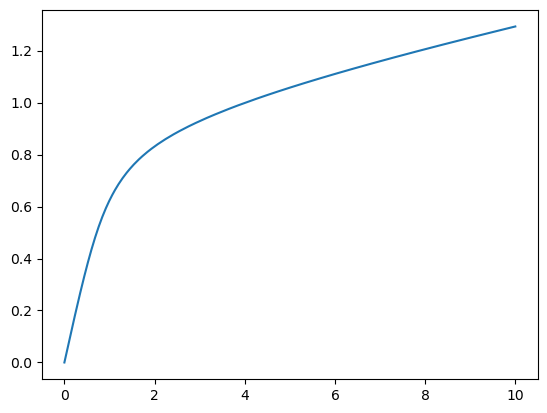

In [ ]:
### Plot policy functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, FinHorizonAgent.solution[0].cFunc(mGrid))
plt.show()

In [ ]:
# Fake News Algorithm begins below ( To find fake news algorithm See page 2388 of https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA17434  )

##########
# STEP 1 # of fake news algorithm, As in the paper for Curly Y and Curly D. Here the policies are over assets and consumption so we denote them as curly C and curly D.
##########
a_ss = Agent_GE.aPol_Grid  # steady state Asset Policy
c_ss = Agent_GE.cPol_Grid  # steady state Consumption Policy
tranmat_ss = Agent_GE.tran_matrix  # Steady State Transition Matrix

# List of asset policies grids where households expect the shock to occur in the second to last Period
a_t = FinHorizonAgent.aPol_Grid
# add steady state assets to list as it does not get appended in calc_transition_matrix method
a_t.append(Agent_GE.a_ss)

# List of consumption policies grids where households expect the shock to occur in the second to last Period
c_t = FinHorizonAgent.cPol_Grid
# add steady state consumption to list as it does not get appended in calc_transition_matrix method
c_t.append(Agent_GE.c_ss)

da0_s = []  # Deviation of asset policy from steady state policy
dc0_s = []  # Deviation of Consumption policy from steady state policy
for i in range(T):
    da0_s.append(a_t[T - i] - a_ss)
    dc0_s.append(c_t[T - i] - c_ss)

da0_s = np.array(da0_s)
dc0_s = np.array(dc0_s)


In [ ]:
da0_s.shape

(300, 200)

In [ ]:
np.max(dc0_s)

0.0007069718814740611

In [ ]:
np.sum(FinHorizonAgent.tran_matrix)

60200.00000000006

In [ ]:
np.sum(FinHorizonAgent.tran_matrix[0][0])

1.3859075505129022

In [ ]:
Agent_GE.vec_erg_dstn.T[0].shape

(200,)

In [ ]:
da0_s[i].shape

(200,)

In [ ]:
# Steady state distribution of market resources (permanent income weighted distribution)
D_ss = Agent_GE.vec_erg_dstn.T[0]
dA0_s = []
dC0_s = []
for i in range(T):
    dA0_s.append(np.dot(da0_s[i], D_ss))
    dC0_s.append(np.dot(dc0_s[i], D_ss))

dA0_s = np.array(dA0_s)
# This is equivalent to the curly Y scalar detailed in the first step of the algorithm
A_curl_s = dA0_s / dx

dC0_s = np.array(dC0_s)
C_curl_s = dC0_s / dx

# List of computed transition matrices for each period
tranmat_t = FinHorizonAgent.tran_matrix
tranmat_t.append(tranmat_ss)

# List of change in transition matrix relative to the steady state transition matrix
dlambda0_s = []
for i in range(T):
    dlambda0_s.append(tranmat_t[T  -   i] - tranmat_ss)

dlambda0_s = np.array(dlambda0_s)

dD0_s = []
for i in range(T):
    dD0_s.append(np.dot(dlambda0_s[i], D_ss))

dD0_s = np.array(dD0_s)
D_curl_s = dD0_s / dx  # Curly D in the sequence space jacobian

In [ ]:
dlambda0_s.shape

(300, 200, 200)

In [ ]:
np.max(dlambda0_s)

0.003472110921054594

In [ ]:
########
# STEP2 # of fake news algorithm
########

# Expectation Vectors
exp_vecs_a = []
exp_vecs_c = []

# First expectation vector is the steady state policy
exp_vec_a = a_ss
exp_vec_c = c_ss
for i in range(T):
    exp_vecs_a.append(exp_vec_a)
    exp_vec_a = np.dot(tranmat_ss.T, exp_vec_a)

    exp_vecs_c.append(exp_vec_c)
    exp_vec_c = np.dot(tranmat_ss.T, exp_vec_c)

# Turn expectation vectors into arrays
exp_vecs_a = np.array(exp_vecs_a)
exp_vecs_c = np.array(exp_vecs_c)

In [ ]:
np.max(exp_vecs_a)

482.4562156083529

In [ ]:
exp_vecs_a[0]

array([2.16321692e-06, 1.19826717e-03, 2.41744660e-03, 3.65706471e-03,
       4.91758091e-03, 6.19946759e-03, 7.50321054e-03, 8.82930943e-03,
       1.01782783e-02, 1.15506459e-02, 1.29567092e-02, 1.43967269e-02,
       1.58621631e-02, 1.73536195e-02, 1.88717155e-02, 2.04170890e-02,
       2.19903971e-02, 2.35923166e-02, 2.52586789e-02, 2.69618892e-02,
       2.86966450e-02, 3.04637296e-02, 3.22639502e-02, 3.40981395e-02,
       3.59718551e-02, 3.79460553e-02, 3.99582192e-02, 4.20093246e-02,
       4.41003810e-02, 4.62324304e-02, 4.84134682e-02, 5.07367860e-02,
       5.31065521e-02, 5.55240094e-02, 5.79904425e-02, 6.05071790e-02,
       6.31860637e-02, 6.59558496e-02, 6.87832852e-02, 7.16699750e-02,
       7.46284317e-02, 7.78236501e-02, 8.10872380e-02, 8.44211501e-02,
       8.78274110e-02, 9.15126472e-02, 9.53070618e-02, 9.91856027e-02,
       1.03194848e-01, 1.07542277e-01, 1.11988222e-01, 1.16535659e-01,
       1.21461186e-01, 1.26562024e-01, 1.31781939e-01, 1.37431000e-01,
      

In [ ]:
#########
# STEP3 # of the algorithm. In particular equation 26 of the published paper.
#########
# Fake news matrices
Curl_F_A = np.zeros((T, T))  # Fake news matrix for assets
Curl_F_C = np.zeros((T, T))  # Fake news matrix for consumption

# First row of Fake News Matrix
Curl_F_A[0] = A_curl_s
Curl_F_C[0] = C_curl_s


for i in range(T - 1):
    for j in range(T):
        Curl_F_A[i + 1][j] = np.dot(exp_vecs_a[i], D_curl_s[j])
        Curl_F_C[i + 1][j] = np.dot(exp_vecs_c[i], D_curl_s[j])

In [ ]:
exp_vecs_a.shape

(300, 200)

In [ ]:
D_curl_s.shape

(300, 200)

In [ ]:
Curl_F_A.shape

(300, 300)

In [ ]:
np.max(D_curl_s)

0.14860769160218573

In [ ]:
exp_vecs_a[1]

array([2.68709386e-01, 2.69355502e-01, 2.70014168e-01, 2.70684298e-01,
       2.71369917e-01, 2.72067451e-01, 2.72777472e-01, 2.73501173e-01,
       2.74237471e-01, 2.74986713e-01, 2.75755781e-01, 2.76544598e-01,
       2.77347421e-01, 2.78164498e-01, 2.78996390e-01, 2.79845322e-01,
       2.80712620e-01, 2.81597754e-01, 2.82520451e-01, 2.83467421e-01,
       2.84436253e-01, 2.85426198e-01, 2.86436919e-01, 2.87468863e-01,
       2.88524604e-01, 2.89638148e-01, 2.90773232e-01, 2.91931291e-01,
       2.93113267e-01, 2.94320443e-01, 2.95556530e-01, 2.96874369e-01,
       2.98221089e-01, 2.99598900e-01, 3.01009557e-01, 3.02454675e-01,
       3.03998273e-01, 3.05599818e-01, 3.07238240e-01, 3.08915327e-01,
       3.10635977e-01, 3.12498859e-01, 3.14405551e-01, 3.16359138e-01,
       3.18363357e-01, 3.20538331e-01, 3.22788699e-01, 3.25098943e-01,
       3.27498663e-01, 3.30113279e-01, 3.32796767e-01, 3.35554331e-01,
       3.38549821e-01, 3.41663732e-01, 3.44861706e-01, 3.48335860e-01,
      

In [ ]:
D_curl_s[1]

array([-1.01597681e-07, -6.22482684e-07, -1.21653877e-06, -1.57587248e-06,
       -1.94029750e-06, -3.77234125e-06, -6.71559173e-06, -3.51741924e-06,
       -9.60451840e-06, -3.53690242e-06, -1.66959033e-05,  1.92338724e-06,
       -1.74352519e-05, -9.33593213e-06, -1.42550735e-05, -1.24413213e-05,
       -4.18626095e-05,  1.44278507e-05, -3.57353470e-05, -4.26002788e-05,
        6.57624199e-06, -1.68585388e-07, -1.19918599e-04, -6.81259094e-05,
       -1.26847363e-04, -3.53337507e-05, -4.36023740e-05, -1.40865838e-04,
        8.64248235e-05, -1.31912951e-04, -1.66073542e-04, -5.63937960e-05,
       -2.46225843e-04, -4.86065301e-04,  5.21194719e-04, -4.62742445e-04,
       -6.93942344e-05,  3.10458402e-04, -1.57972635e-03,  1.63825452e-03,
       -1.32139213e-03,  9.70765585e-05, -1.58396892e-03,  1.69293058e-03,
       -1.27085481e-03,  4.85799201e-05,  7.60089722e-04, -2.76331704e-03,
        2.34691801e-04,  9.79282762e-04, -3.11300334e-03,  8.07600463e-04,
        8.30292399e-04, -

In [ ]:

########
# STEP4 #  of the algorithm
########

# Function to compute jacobian matrix from fake news matrix
def J_from_F(F):
    J = F.copy()
    for t in range(1, F.shape[0]):
        J[1:, t] += J[:-1, t-1]
    return J

J_A = J_from_F(Curl_F_A)
J_C = J_from_F(Curl_F_C)




In [ ]:
np.max(Curl_F_A)

1.2424146028963443

In [ ]:
np.min(Curl_F_A)

-1.3555379418857666e-13

In [ ]:
Curl_F_A[1]

array([0.00000000e+00, 1.24241460e+00, 1.51629875e-01, 1.30141040e-01,
       1.11931560e-01, 9.63966249e-02, 8.30983703e-02, 7.16919059e-02,
       6.18939845e-02, 5.34679397e-02, 4.62143999e-02, 3.99646511e-02,
       3.45755407e-02, 2.99252746e-02, 2.59100118e-02, 2.24410556e-02,
       1.94425229e-02, 1.68493990e-02, 1.46059104e-02, 1.26641556e-02,
       1.09829522e-02, 9.52686114e-03, 8.26536032e-03, 7.17214229e-03,
       6.22451663e-03, 5.40290032e-03, 4.69038249e-03, 4.07235218e-03,
       3.53617939e-03, 3.07094178e-03, 2.66718990e-03, 2.31674556e-03,
       2.01252831e-03, 1.74840624e-03, 1.51906728e-03, 1.31990835e-03,
       1.14693976e-03, 9.96702648e-04, 8.66197701e-04, 7.52823587e-04,
       6.54323716e-04, 5.68740221e-04, 4.94374134e-04, 4.29750927e-04,
       3.73590687e-04, 3.24782277e-04, 2.82360970e-04, 2.45489052e-04,
       2.13439030e-04, 1.85579061e-04, 1.61360326e-04, 1.40306079e-04,
       1.22002147e-04, 1.06088689e-04, 9.22530475e-05, 8.02235429e-05,
      

In [ ]:
J_A[1]

array([0.00000000e+00, 1.24241460e+00, 3.50375176e-01, 2.99645606e-01,
       2.57117010e-01, 2.21064238e-01, 1.90314863e-01, 1.64006766e-01,
       1.41453952e-01, 1.22091529e-01, 1.05447595e-01, 9.11251546e-02,
       7.87888380e-02, 6.81543810e-02, 5.89801966e-02, 5.10605007e-02,
       4.42196593e-02, 3.83075115e-02, 3.31954779e-02, 2.87733093e-02,
       2.49463587e-02, 2.16332852e-02, 1.87641151e-02, 1.62786005e-02,
       1.41248263e-02, 1.22580256e-02, 1.06395700e-02, 9.23610819e-03,
       8.01882954e-03, 6.96283326e-03, 6.04658818e-03, 5.25146894e-03,
       4.56135766e-03, 3.96230142e-03, 3.44221752e-03, 2.99063967e-03,
       2.59849922e-03, 2.25793649e-03, 1.96213799e-03, 1.70519583e-03,
       1.48198632e-03, 1.28806504e-03, 1.11957606e-03, 9.73173526e-04,
       8.45953669e-04, 7.35396077e-04, 6.39312776e-04, 5.55804142e-04,
       4.83220711e-04, 4.20130077e-04, 3.65288198e-04, 3.17614530e-04,
       2.76170446e-04, 2.40140534e-04, 2.08816363e-04, 1.81582405e-04,
      

In [ ]:
########
# Additional step due to compute Zeroth Column of the Jacobian
########   
    
params = deepcopy(Agent_GE.__dict__["parameters"])
params["T_cycle"] = 2 # Dimension of Jacobian Matrix

params["LivPrb"] = params["T_cycle"] * [Agent_GE.LivPrb[0]]
params["PermGroFac"] = params["T_cycle"] * [Agent_GE.PermGroFac[0]]
params["PermShkStd"] = params["T_cycle"] * [Agent_GE.PermShkStd[0]]
params["TranShkStd"] = params["T_cycle"] * [Agent_GE.TranShkStd[0]]
params["Rfree"] = params["T_cycle"] * [Agent_GE.Rfree]
params["UnempPrb"] = params["T_cycle"] * [Agent_GE.UnempPrb]
params["IncUnemp"] = params["T_cycle"] * [Agent_GE.IncUnemp]
params['wage'] = params['T_cycle']*[Agent_GE.wage[0]]
params['taxrate'] = params['T_cycle']*[Agent_GE.taxrate[0]]
params['labor'] = params['T_cycle']*[Agent_GE.labor[0]]
params['TranShkMean_Func'] = params['T_cycle']*[Agent_GE.TranShkMean_Func[0]]
params['IncShkDstn'] = params['T_cycle']* [Agent_GE.IncShkDstn[0]]
params['cFunc_terminal_'] = deepcopy(Agent_GE.solution[0].cFunc)

if shk_param == 'DiscFac':
    
    params['DiscFac'] = params['T_cycle']*[Agent_GE.DiscFac]

# Create instance of a finite horizon agent for calculation of zeroth
ZerothColAgent = IndShockConsumerType(**params)
ZerothColAgent.cycles = 1  # required

# If parameter is in time invariant list then add it to time vary list
ZerothColAgent.del_from_time_inv(shk_param)
ZerothColAgent.add_to_time_vary(shk_param)

if type(getattr(Agent_GE, shk_param)) == list:
    ZerothColAgent.shk_param = params['T_cycle'] * [getattr(Agent_GE, shk_param)[0]]
else:
    ZerothColAgent.shk_param = params['T_cycle'] * [getattr(Agent_GE, shk_param)]

# Update income process if perturbed parameter enters the income shock distribution
ZerothColAgent.update_income_process()

# Solve
ZerothColAgent.solve()

# this condition is because some attributes are specified as lists while other as floats
if type(getattr(Agent_GE, shk_param)) == list:
    peturbed_list = (
            [getattr(Agent_GE, shk_param)[0] + dx]
        + (params["T_cycle"]  - 1) * [getattr(Agent_GE, shk_param)[0]]
    )  # Sequence of interest rates the agent faces
else:
    peturbed_list = (
            [getattr(Agent_GE, shk_param) + dx]
        + (params["T_cycle"]  - 1) * [getattr(Agent_GE, shk_param)]
    )  # Sequence of interest rates the agent 
    
setattr(ZerothColAgent, shk_param, peturbed_list) # Set attribute to agent

# Use Harmenberg Neutral Measure
ZerothColAgent.neutral_measure = True
ZerothColAgent.update_income_process()

# Calculate Transition Matrices
ZerothColAgent.define_distribution_grid()
ZerothColAgent.calc_transition_matrix()

tranmat_t_zeroth_col = ZerothColAgent.tran_matrix
dstn_t_zeroth_col = Agent_GE.vec_erg_dstn.T[0]

C_t_no_sim = np.zeros(T)
A_t_no_sim = np.zeros(T)

for i in range(T):
    if i ==0:
        dstn_t_zeroth_col = np.dot(tranmat_t_zeroth_col[i],dstn_t_zeroth_col)
    else:
        dstn_t_zeroth_col = np.dot(tranmat_ss,dstn_t_zeroth_col)
        
    C_t_no_sim[i] =  np.dot(Agent_GE.cPol_Grid ,dstn_t_zeroth_col) 
    A_t_no_sim[i] =  np.dot( Agent_GE.aPol_Grid ,dstn_t_zeroth_col) 

J_A.T[0] = (A_t_no_sim - Agent_GE.A_ss)/dx
J_C.T[0] = (C_t_no_sim - Agent_GE.C_ss)/dx